In [1]:
# importing helpful files
import numpy as np
import pandas as pd

In [2]:
csv_data = pd.read_csv("csv-file/covid-trade-2020.csv")

In [3]:
csv_data.head(10)

,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,31/01/2015,Saturday,1/02/2020,All,All,All,$,257000000,257000000
1,Exports,2015,1/02/2015,Sunday,2/02/2020,All,All,All,$,123000000,380000000
2,Exports,2015,2/02/2015,Monday,3/02/2020,All,All,All,$,176000000,556000000
3,Exports,2015,3/02/2015,Tuesday,4/02/2020,All,All,All,$,115000000,671000000
4,Exports,2015,4/02/2015,Wednesday,5/02/2020,All,All,All,$,74000000,746000000
5,Exports,2015,5/02/2015,Thursday,6/02/2020,All,All,All,$,119000000,864000000
6,Exports,2015,6/02/2015,Friday,7/02/2020,All,All,All,$,127000000,992000000
7,Exports,2015,7/02/2015,Saturday,8/02/2020,All,All,All,$,206000000,1198000000
8,Exports,2015,8/02/2015,Sunday,9/02/2020,All,All,All,$,114000000,1312000000
9,Exports,2015,9/02/2015,Monday,10/02/2020,All,All,All,$,202000000,1513000000


In [4]:
# Viewing the columns in the dataset
csv_data.columns

Index(['Direction', 'Year', 'Date', 'Weekday', 'Current_Match', 'Country',
       'Commodity', 'Transport_Mode', 'Measure', 'Value', 'Cumulative'],
      dtype='object')

In [5]:
# Viewing the dataset of each column
csv_data.dtypes

Direction         object
Year               int64
Date              object
Weekday           object
Current_Match     object
Country           object
Commodity         object
Transport_Mode    object
Measure           object
Value              int64
Cumulative         int64
dtype: object

In [6]:
csv_data.isnull().sum(axis = 0)

Direction         0
Year              0
Date              0
Weekday           0
Current_Match     0
Country           0
Commodity         0
Transport_Mode    0
Measure           0
Value             0
Cumulative        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb917818310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9177b5b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb917818150>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9177c2610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9184c6510>],
 'means': []}

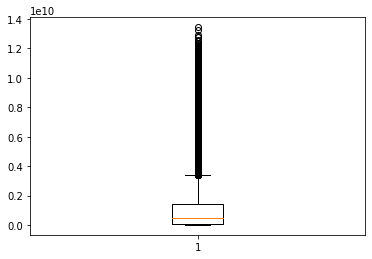

In [7]:
# Plotting the boxplot to view the exceptionally out of boundaries values

import matplotlib.pyplot as plt 
plt.boxplot(csv_data['Cumulative'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb917747450>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb917747f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb917734410>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9176d0990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9176d0e90>],
 'means': []}

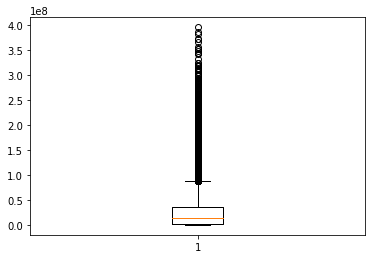

In [8]:
plt.boxplot(csv_data['Value'])

In [9]:
# Grouping by 'Year','Country', 'Direction', 'Transport_Mode' to filter out lot of rows and see the trade trends

updated_csv = csv_data.groupby(['Year','Country', 'Direction', 'Transport_Mode'], as_index=False)['Value', 'Cumulative'].sum()


/home/jillani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Lets check the again shape. Now it should have reduced

updated_csv.shape

(96, 6)

TypeError: no numeric data to plot

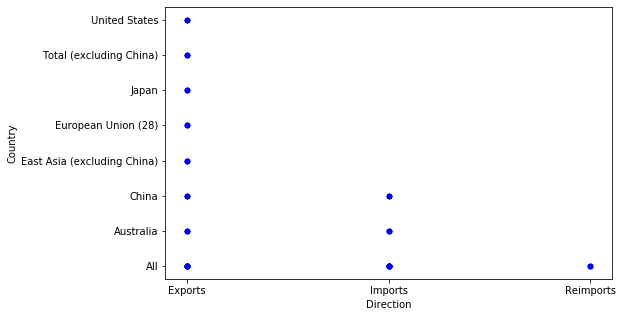

In [12]:
# Seeing for which counteries Export and Imports are mostly done

plt.rcParams["figure.figsize"] = (8,5)
updated_csv.plot.scatter(x = 'Direction', y = 'Country', c = 'blue')
#######
updated_csv.plot.line(x = 'Direction', y = 'Country', c = 'red')